## Design of a grating monochromator for a joint SSRL/ALS beamline
awojdyla@lbl.gov, Jan 2026

/var/folders/hr/17npbd3151g552w6q43kqpr80000gn/T/ipykernel_58563/1051299629.py:8: RuntimeWarning: divide by zero encountered in divide
  g_lpm = RP**2/p_m**2*L_und/(cff**2-1)*(2*2.35/np.pi)**2
/var/folders/hr/17npbd3151g552w6q43kqpr80000gn/T/ipykernel_58563/1051299629.py:9: RuntimeWarning: divide by zero encountered in divide
  gn_lpm = RP**2/p_m**2*L_und/(1-cff**2)*(2*2.35/np.pi)**2


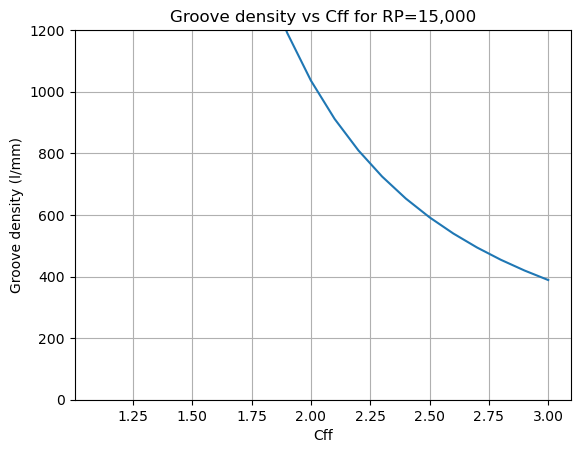

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

RP =15000
L_und = 2
p_m = 18
cff = np.linspace(1, 3, 21)
g_lpm = RP**2/p_m**2*L_und/(cff**2-1)*(2*2.35/np.pi)**2
gn_lpm = RP**2/p_m**2*L_und/(1-cff**2)*(2*2.35/np.pi)**2

plt.plot(cff, g_lpm*1e-3)
plt.xlabel('Cff')
plt.ylabel('Groove density (l/mm)')
plt.title('Groove density vs Cff for RP=15,000')
plt.ylim((0, 1200))
plt.grid()
plt.show()  

/var/folders/hr/17npbd3151g552w6q43kqpr80000gn/T/ipykernel_58563/134859337.py:9: RuntimeWarning: divide by zero encountered in divide
  gn_lpm = RP**2/p_m**2*L_und/(1-cff**2)*(2*2.35/np.pi)**2


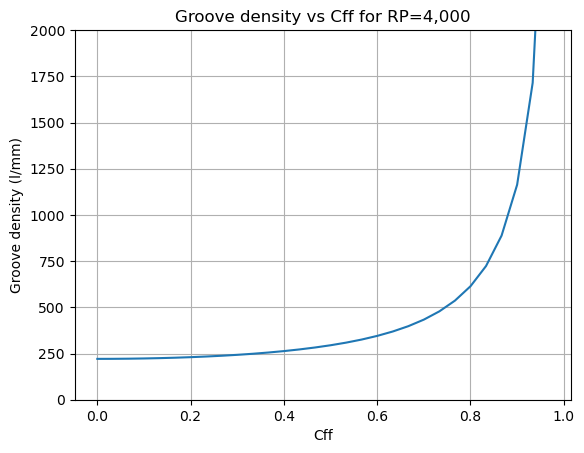

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

RP =4000
L_und = 2
p_m = 18
cff = np.linspace(0, 1, 31)

gn_lpm = RP**2/p_m**2*L_und/(1-cff**2)*(2*2.35/np.pi)**2

plt.plot(cff, gn_lpm*1e-3)
plt.xlabel('Cff')
plt.ylabel('Groove density (l/mm)')
plt.title('Groove density vs Cff for RP=4,000')
plt.ylim((0, 2000))
plt.grid()
plt.show()  

## Flux through an aperture

In [3]:
import json

filename = '../data/spectra-ssrl/ssrl_10_1_-51_101.json'
# Replace 'data.json' with the path to your file

with open(filename, 'r') as file:
    data = json.load(file)

# The 'data' variable is now a Python object (usually a dictionary or a list)
# print(data)
# print(type(data))

In [4]:
E_eV = data['Output']['Set Value']
xp_mrad = data['Output']['data'][0]
xp_mrad = data['Output']['data'][0]
yp_mrad = data['Output']['data'][1]
flux_ph_ps_p01BW = data['Output']['data'][2]

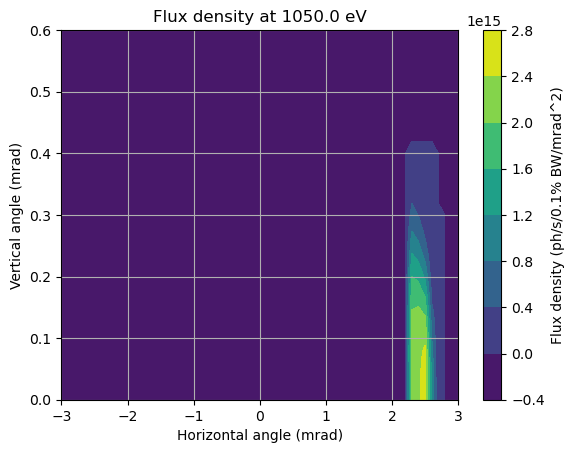

In [5]:
X,Y = np.meshgrid(xp_mrad, yp_mrad)
flux_density_ph_ps_p01BW= np.array(flux_ph_ps_p01BW).reshape(len(yp_mrad), len(xp_mrad))

mask_x = (X < 2.25) | (X > 2.75)
mask_y = (Y > 0.4)
flux_aperture_density_ph_ps_p01BW = flux_density_ph_ps_p01BW.copy()
flux_aperture_density_ph_ps_p01BW[mask_x | mask_y] = 0

plt.contourf(X, Y, flux_aperture_density_ph_ps_p01BW, cmap='viridis')
plt.xlabel('Horizontal angle (mrad)')
plt.ylabel('Vertical angle (mrad)')
plt.title(f'Flux density at {E_eV:.1f} eV')
plt.colorbar(label='Flux density (ph/s/0.1% BW/mrad^2)')
plt.grid()
plt.show()  

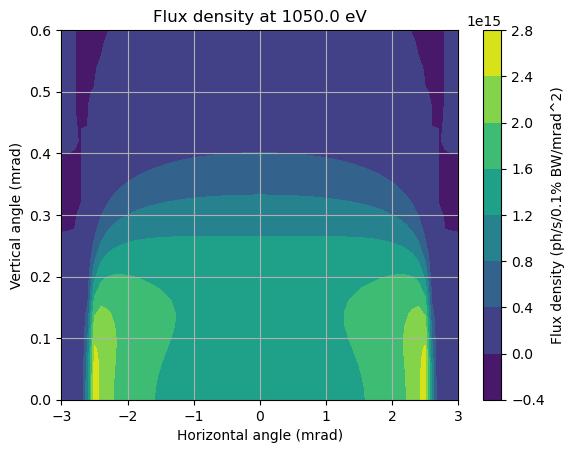

In [6]:
X,Y = np.meshgrid(xp_mrad, yp_mrad)
flux_density_ph_ps_p01BW= np.array(flux_ph_ps_p01BW).reshape(len(yp_mrad), len(xp_mrad))

mask_x = False
mask_y = False
flux_aperture_density_ph_ps_p01BW = flux_density_ph_ps_p01BW.copy()
flux_aperture_density_ph_ps_p01BW[mask_x | mask_y] = 0

plt.contourf(X, Y, flux_aperture_density_ph_ps_p01BW, cmap='viridis')
plt.xlabel('Horizontal angle (mrad)')
plt.ylabel('Vertical angle (mrad)')
plt.title(f'Flux density at {E_eV:.1f} eV')
plt.colorbar(label='Flux density (ph/s/0.1% BW/mrad^2)')
plt.grid()
plt.show()  

In [7]:
dx_mrad = xp_mrad[1] - xp_mrad[0]
dy_mrad = yp_mrad[1] - yp_mrad[0]   
total_flux = 2*np.sum(flux_aperture_density_ph_ps_p01BW) * dx_mrad * dy_mrad

In [8]:
total_flux*1e-12

np.float64(5543.9943343872255)

In [9]:
import json

N_f = 156
E_list_eV = np.zeros(N_f)
full_flux_list_ph_ps_p01BW = np.zeros(N_f)
apertured_flux_list_ph_ps_p01BW = np.zeros(N_f)

for i_f in range(1, 156) :
    #print(f'Processing file {i_f} of {N_f-1}')
    filename = f'../data/spectra-ssrl/ssrl_10_1_-51_{i_f}.json'
    # Replace 'data.json' with the path to your file


    with open(filename, 'r') as file:
        data = json.load(file)

    E_eV = data['Output']['Set Value']
    xp_mrad = data['Output']['data'][0]
    xp_mrad = data['Output']['data'][0]
    yp_mrad = data['Output']['data'][1]
    flux_ph_ps_p01BW = data['Output']['data'][2]

    X,Y = np.meshgrid(xp_mrad, yp_mrad)
    flux_density_ph_ps_p01BW= np.array(flux_ph_ps_p01BW).reshape(len(yp_mrad), len(xp_mrad))

    mask_x = (X < 2.25) | (X > 2.75)
    mask_y = (Y > 0.4)
    flux_aperture_density_ph_ps_p01BW = flux_density_ph_ps_p01BW.copy()
    flux_aperture_density_ph_ps_p01BW[mask_x | mask_y] = 0

    dx_mrad = xp_mrad[1] - xp_mrad[0]
    dy_mrad = yp_mrad[1] - yp_mrad[0]

    full_flux_ph_ps_p01BW      = 2*np.sum(flux_density_ph_ps_p01BW) * dx_mrad * dy_mrad
    apertured_flux_ph_ps_p01BW = 2*np.sum(flux_aperture_density_ph_ps_p01BW) * dx_mrad * dy_mrad

    E_list_eV[i_f] = E_eV
    full_flux_list_ph_ps_p01BW[i_f] = full_flux_ph_ps_p01BW
    apertured_flux_list_ph_ps_p01BW[i_f] = apertured_flux_ph_ps_p01BW

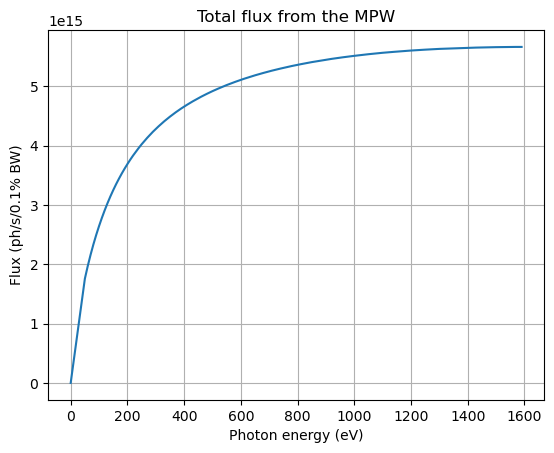

In [10]:
plt.plot(E_list_eV, full_flux_list_ph_ps_p01BW, label='Full flux')
plt.xlabel('Photon energy (eV)')
plt.ylabel('Flux (ph/s/0.1% BW)')
plt.title('Total flux from the MPW')
plt.grid()
plt.show()

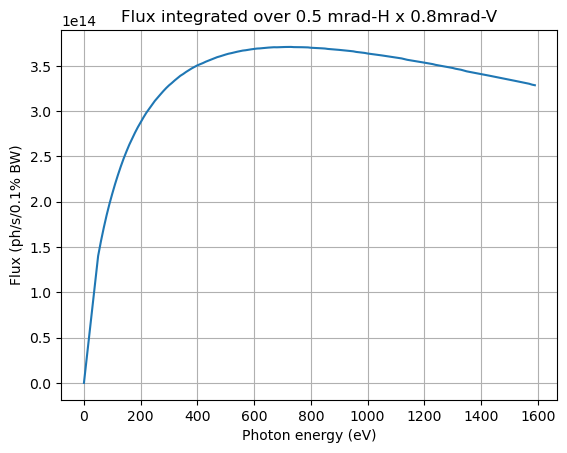

In [11]:
plt.plot(E_list_eV, apertured_flux_list_ph_ps_p01BW, label='Full flux')
plt.xlabel('Photon energy (eV)')
plt.ylabel('Flux (ph/s/0.1% BW)')
plt.title('Flux integrated over 0.5 mrad-H x 0.8mrad-V')
plt.grid()
plt.show()

/var/folders/hr/17npbd3151g552w6q43kqpr80000gn/T/ipykernel_58563/1541370527.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(E_list_eV, apertured_flux_list_ph_ps_p01BW/full_flux_list_ph_ps_p01BW * 100, label='Full flux')


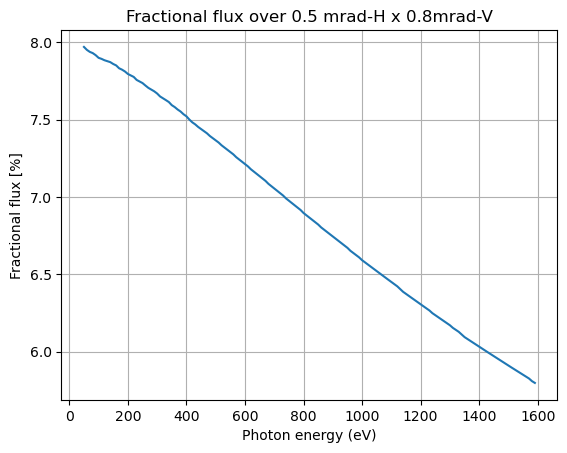

In [12]:
plt.plot(E_list_eV, apertured_flux_list_ph_ps_p01BW/full_flux_list_ph_ps_p01BW * 100, label='Full flux')
plt.xlabel('Photon energy (eV)')
plt.ylabel('Fractional flux [%]')
plt.title('Fractional flux over 0.5 mrad-H x 0.8mrad-V')
plt.grid()
plt.show()

In [13]:
import json

N_f = 156
E_list_eV = np.zeros(N_f)
flux_cumsum_ph_ps_p01BW = np.zeros((Y.shape[0],N_f))
fractional_flux_cumsum = np.zeros((Y.shape[0],N_f))

for i_f in range(1, 156) :
    #print(f'Processing file {i_f} of {N_f-1}')
    filename = f'../data/spectra-ssrl/ssrl_10_1_-51_{i_f}.json'
    # Replace 'data.json' with the path to your file


    with open(filename, 'r') as file:
        data = json.load(file)

    E_eV = data['Output']['Set Value']
    xp_mrad = data['Output']['data'][0]
    xp_mrad = data['Output']['data'][0]
    yp_mrad = data['Output']['data'][1]
    flux_ph_ps_p01BW = data['Output']['data'][2]

    X,Y = np.meshgrid(xp_mrad, yp_mrad)
    flux_density_ph_ps_p01BW= np.array(flux_ph_ps_p01BW).reshape(len(yp_mrad), len(xp_mrad))

    mask_x = (X < 2.25) | (X > 2.75)
    mask_y = (Y > 0.4)
    flux_aperture_density_ph_ps_p01BW = flux_density_ph_ps_p01BW.copy()
    flux_aperture_density_ph_ps_p01BW[mask_x | mask_y] = 0

    flux_cumsum_ph_ps_p01BW[:,i_f]  = 2*np.cumsum(np.sum(flux_aperture_density_ph_ps_p01BW,axis=1)) * dx_mrad * dy_mrad
    flux_cumsum_ph_ps_p01BW[1:-1,i_f] = flux_cumsum_ph_ps_p01BW[0:-2,i_f]
    flux_cumsum_ph_ps_p01BW[0,:]    = 0
    fractional_flux_cumsum[:,i_f] = flux_cumsum_ph_ps_p01BW[:,i_f]/flux_cumsum_ph_ps_p01BW[-1,i_f]

    E_list_eV[i_f] = E_eV
    full_flux_list_ph_ps_p01BW[i_f] = full_flux_ph_ps_p01BW
    apertured_flux_list_ph_ps_p01BW[i_f] = apertured_flux_ph_ps_p01BW

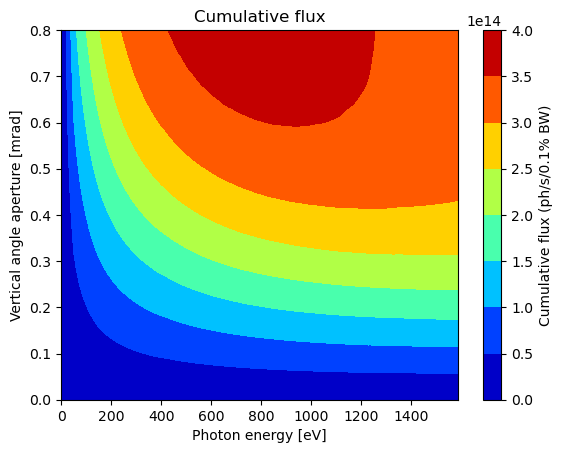

In [14]:
plt.contourf(E_list_eV, 2*Y[:,0], (flux_cumsum_ph_ps_p01BW), origin='lower', cmap='jet')
plt.xlabel('Photon energy [eV]')
plt.ylim((0, 0.8))
plt.ylabel('Vertical angle aperture [mrad]')
plt.title('Cumulative flux')
plt.colorbar(label='Cumulative flux (ph/s/0.1% BW)')
plt.show()  

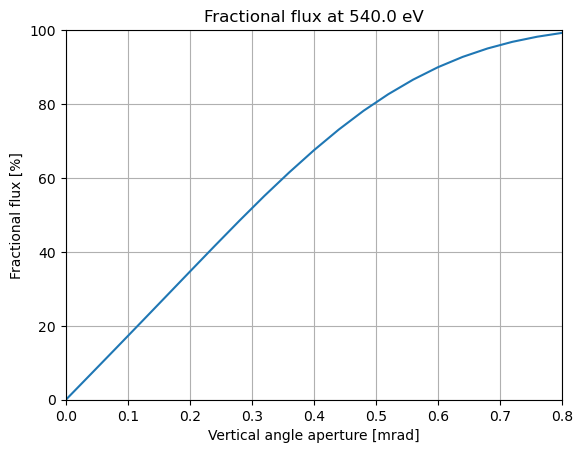

In [15]:
plt.plot(2*Y[:,0], fractional_flux_cumsum[:,50]*100)
plt.xlabel('Vertical angle aperture [mrad]')
plt.ylabel('Fractional flux [%]')
plt.title(f'Fractional flux at {E_list_eV[50]:.1f} eV')
plt.xlim((0, 0.8))
plt.ylim((0, 100))
plt.grid()
plt.show()  

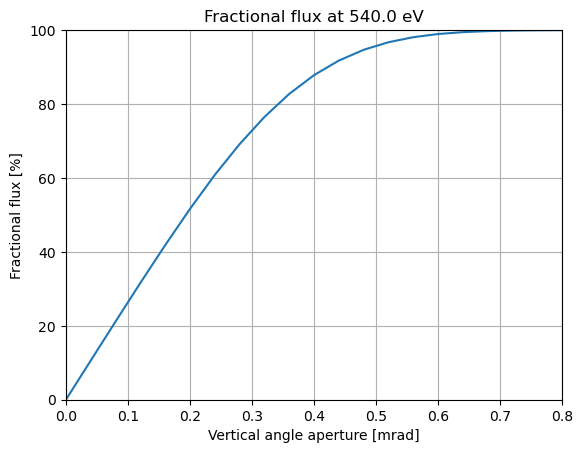

In [16]:
plt.plot(2*Y[:,0], fractional_flux_cumsum[:,151]*100)
plt.xlabel('Vertical angle aperture [mrad]')
plt.ylabel('Fractional flux [%]')
plt.title(f'Fractional flux at {E_list_eV[50]:.1f} eV')
plt.xlim((0, 0.8))
plt.ylim((0, 100))
plt.grid()
plt.show()  

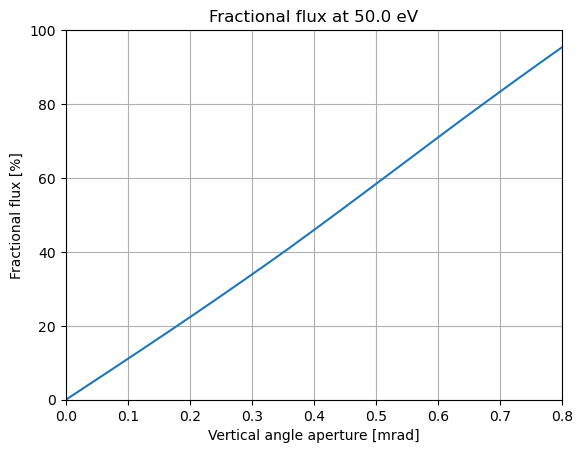

In [17]:
plt.plot(2*Y[:,0], fractional_flux_cumsum[:,1]*100)
plt.xlabel('Vertical angle aperture [mrad]')
plt.ylabel('Fractional flux [%]')
plt.title(f'Fractional flux at {E_list_eV[1]:.1f} eV')
plt.xlim((0, 0.8))
plt.ylim((0, 100))
plt.grid()
plt.show()  

In [18]:
# !pip install xrt
# !pip install periodictable

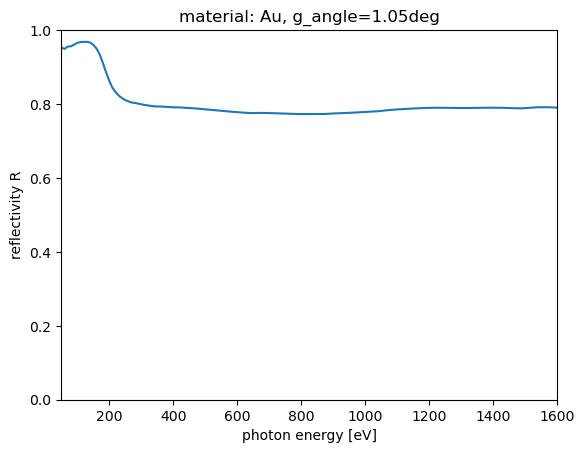

In [19]:
import xrt.backends.raycing.materials as rm
import matplotlib.pyplot as plt
import periodictable as pt
import numpy as np

rho = pt.Au.density
mat = rm.Material('Au',table='Henke',rho=rho)

E_min_eV = 50
E_max_eV = 1600

ga_rad = 1.05*np.pi/180

N_i = 156
energies_eV = np.linspace(E_min_eV, E_max_eV, N_i)
R = np.zeros(N_i)
Rs = np.zeros(N_i)
Rp = np.zeros(N_i)
for i in np.arange(N_i):
    beamInDotNormal = np.cos(np.pi/2-ga_rad)
    (rs,rp,c,d) = mat.get_amplitude(energies_eV[i],beamInDotNormal)

    R[i] = 0.5*(np.abs(rs)**2+np.abs(rp)**2)
    Rs[i] = np.abs(rs)**2
    Rp[i] = np.abs(rp)**2
    
plt.plot(energies_eV, R)
#plt.plot(energies_eV, Rs, energies_eV, Rp)
plt.xlabel('photon energy [eV]')
plt.ylabel('reflectivity R')
plt.title('material: '+ mat.name+ ', g_angle=%1.2fdeg' %(ga_rad*180/np.pi))
plt.xlim((np.min(energies_eV),np.max(energies_eV)))
plt.ylim((0,1))

plt.show()

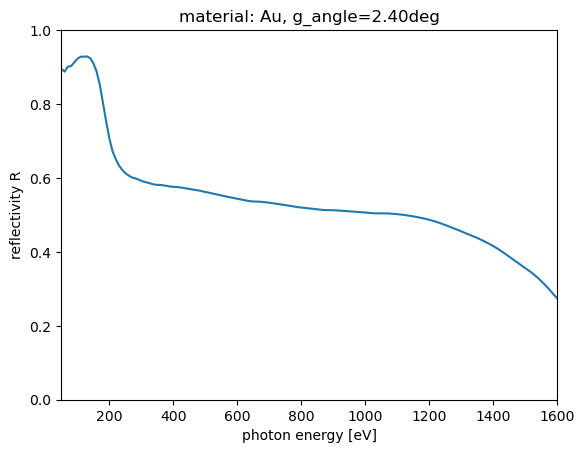

In [20]:
ga_rad = 2.40*np.pi/180

for i in np.arange(N_i):
    beamInDotNormal = np.cos(np.pi/2-ga_rad)
    (rs,rp,c,d) = mat.get_amplitude(energies_eV[i],beamInDotNormal)

    R[i] = 0.5*(np.abs(rs)**2+np.abs(rp)**2)
    
plt.plot(energies_eV, R)
#plt.plot(energies_eV, Rs, energies_eV, Rp)
plt.xlabel('photon energy [eV]')
plt.ylabel('reflectivity R')
plt.title('material: '+ mat.name+ ', g_angle=%1.2fdeg' %(ga_rad*180/np.pi))
plt.xlim((np.min(energies_eV),np.max(energies_eV)))
plt.ylim((0,1))

plt.show()

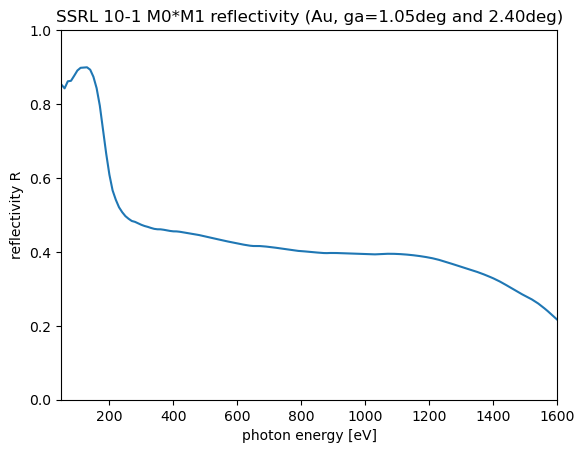

In [21]:
R_M0 = np.zeros(N_i)
R_M1 = np.zeros(N_i)
ga_M0_rad = 1.05*np.pi/180
for i in np.arange(N_i):
    beamInDotNormal = np.cos(np.pi/2-ga_M0_rad)
    (rs,rp,c,d) = mat.get_amplitude(energies_eV[i],beamInDotNormal)
    R_M0[i] = 0.5*(np.abs(rs)**2+np.abs(rp)**2)

ga_M1_rad = 2.40*np.pi/180
for i in np.arange(N_i):
    beamInDotNormal = np.cos(np.pi/2-ga_M1_rad)
    (rs,rp,c,d) = mat.get_amplitude(energies_eV[i],beamInDotNormal)
    R_M1[i] = 0.5*(np.abs(rs)**2+np.abs(rp)**2)

plt.plot(energies_eV, R_M0*R_M1)
#plt.plot(energies_eV, Rs, energies_eV, Rp)
plt.xlabel('photon energy [eV]')
plt.ylabel('reflectivity R')
plt.title('SSRL 10-1 M0*M1 reflectivity (Au, ga=%1.2fdeg and %1.2fdeg)' %(ga_M0_rad*180/np.pi, ga_M1_rad*180/np.pi))
plt.xlim((np.min(energies_eV),np.max(energies_eV)))
plt.ylim((0,1))

plt.show()

In [22]:
from scipy.io import loadmat

# Load the MATLAB file
matlab_file_path = '../data/matlab-ssrl/LEG_a.mat'
matlab_data = loadmat(matlab_file_path)

# Display the keys in the loaded MATLAB file
print(matlab_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Egs_eV', 'cff', 'etas_blaze', 'g_lpm', 'thetas_rad'])


In [23]:
cff = matlab_data['cff'].flatten()
Em_eV = matlab_data['Egs_eV'].flatten()
etas_blaze = matlab_data['etas_blaze'].flatten()  
g_lpm = matlab_data['g_lpm'].flatten()
thetas_rad = matlab_data['thetas_rad'].flatten()

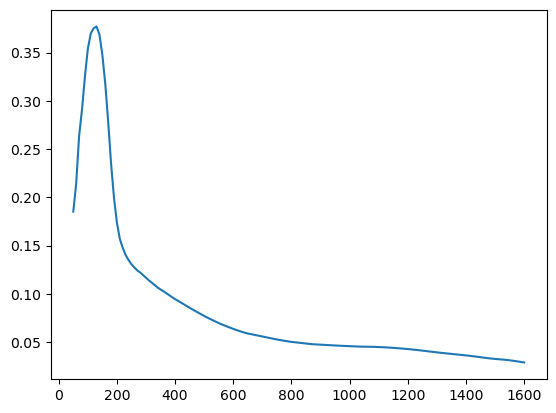

In [24]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(Em_eV, etas_blaze)
plt.show()

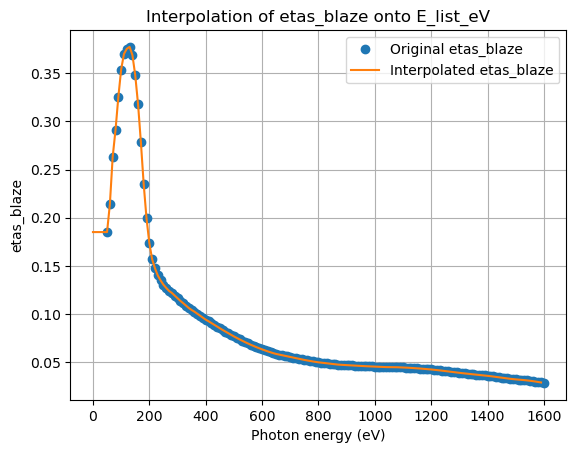

In [25]:
from scipy.interpolate import interp1d

# Interpolate etas_blaze onto E_list_eV
etas_blaze_interp = np.interp(E_list_eV, Em_eV, etas_blaze)
thetas_rad_interp = np.interp(E_list_eV, Em_eV, thetas_rad)

# Plot the interpolated data
plt.plot(Em_eV, etas_blaze, 'o', label='Original etas_blaze')
plt.plot(E_list_eV, etas_blaze_interp, '-', label='Interpolated etas_blaze')
plt.xlabel('Photon energy (eV)')
plt.ylabel('etas_blaze')
plt.legend()
plt.title('Interpolation of etas_blaze onto E_list_eV')
plt.grid()
plt.show()

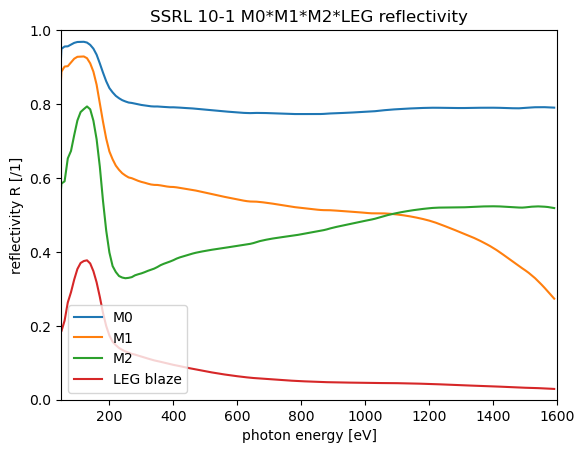

In [26]:
R_M0 = np.zeros(E_list_eV.shape)
R_M1 = np.zeros(E_list_eV.shape)

ga_M0_rad = 1.05*np.pi/180
for i in np.arange(N_i):
    if i!= 0:
        beamInDotNormal = np.cos(np.pi/2-ga_M0_rad)
        (rs,rp,c,d) = mat.get_amplitude(energies_eV[i],beamInDotNormal)
        R_M0[i] = 0.5*(np.abs(rs)**2+np.abs(rp)**2)

ga_M1_rad = 2.40*np.pi/180
for i in np.arange(N_i):
    if i!= 0:
        beamInDotNormal = np.cos(np.pi/2-ga_M1_rad)
        (rs,rp,c,d) = mat.get_amplitude(energies_eV[i],beamInDotNormal)
        R_M1[i] = 0.5*(np.abs(rs)**2+np.abs(rp)**2)

R_M2 = np.zeros(E_list_eV.shape)
for i in np.arange(E_list_eV.shape[0]):
    if i!= 0:
        beamInDotNormal = np.cos(thetas_rad_interp[i])
        (rs,rp,c,d) = mat.get_amplitude(E_list_eV[i],beamInDotNormal)
        R_M2[i] = 0.5*(np.abs(rs)**2+np.abs(rp)**2)


total_efficiency = R_M0*R_M1*R_M2*etas_blaze_interp
plt.plot(E_list_eV, R_M0, E_list_eV, R_M1, E_list_eV, R_M2, E_list_eV, etas_blaze_interp)
#plt.plot(energies_eV, Rs, energies_eV, Rp)
plt.xlabel('photon energy [eV]')
plt.ylabel('reflectivity R [/1]')
plt.legend(['M0', 'M1', 'M2', 'LEG blaze'])
plt.title('SSRL 10-1 M0*M1*M2*LEG reflectivity')
plt.xlim((np.min(energies_eV),np.max(energies_eV)))
plt.ylim((0,1))
plt.show()

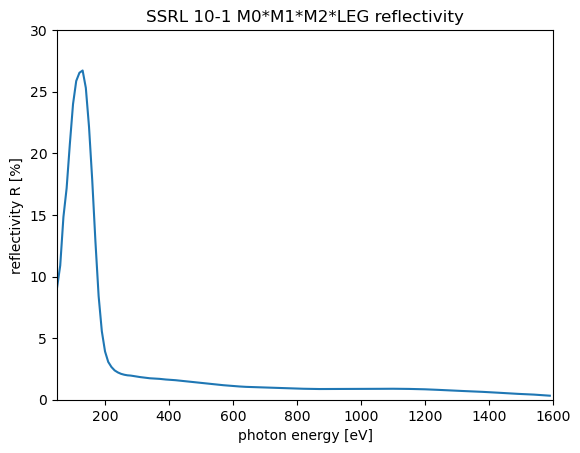

In [27]:
total_efficiency = R_M0*R_M1*R_M2*etas_blaze_interp
plt.plot(E_list_eV, total_efficiency*100)
#plt.plot(energies_eV, Rs, energies_eV, Rp)
plt.xlabel('photon energy [eV]')
plt.ylabel('reflectivity R [%]')
plt.title('SSRL 10-1 M0*M1*M2*LEG reflectivity')
plt.xlim((np.min(energies_eV),np.max(energies_eV)))
plt.ylim((0,30))

plt.show()

In [28]:
frac = 1/np.sqrt(E_list_eV/50)
frac_e = frac*0.8

frac_flux_ph_s_01pcBW = np.zeros(E_list_eV.shape)
transmitted_flux_ph_s = np.zeros(E_list_eV.shape)
resolved_flux_ph_s = np.zeros(E_list_eV.shape)
for i_e in range(E_list_eV.shape[0]):
    frac_flux_ph_s_01pcBW[i_e] = np.interp(frac_e[i_e], 2*Y[:,0], flux_cumsum_ph_ps_p01BW[:,i_e])
    resolved_flux_ph_s[i_e]  = frac_flux_ph_s_01pcBW[i_e]*0.1
    transmitted_flux_ph_s[i_e] = resolved_flux_ph_s[i_e]*total_efficiency[i_e]

/var/folders/hr/17npbd3151g552w6q43kqpr80000gn/T/ipykernel_58563/3004110217.py:1: RuntimeWarning: divide by zero encountered in divide
  frac = 1/np.sqrt(E_list_eV/50)


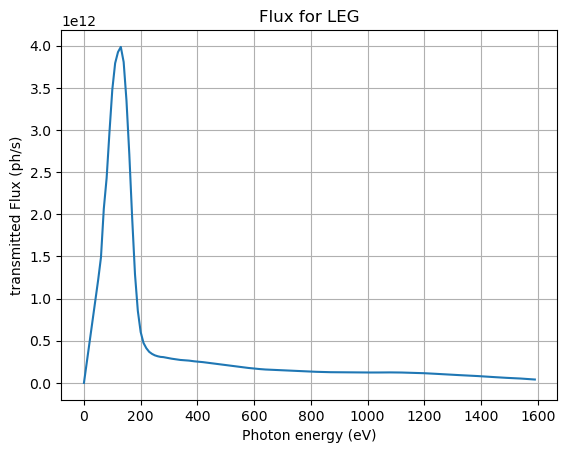

In [29]:
plt.plot(E_list_eV, transmitted_flux_ph_s, label='Full flux')
plt.xlabel('Photon energy (eV)')
plt.ylabel('transmitted Flux (ph/s)')
plt.title('Flux for LEG')
plt.grid()

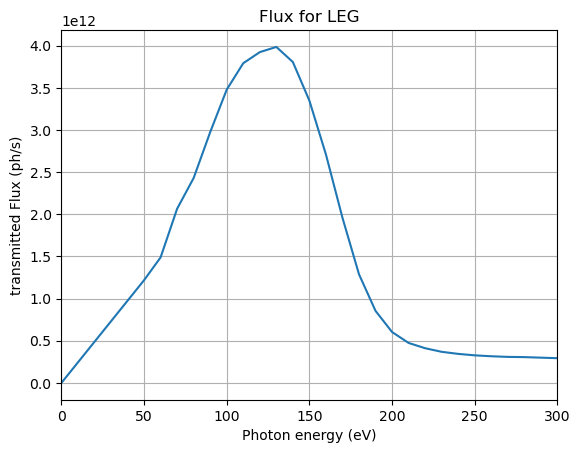

In [30]:
plt.plot(E_list_eV, transmitted_flux_ph_s, label='Full flux')
plt.xlabel('Photon energy (eV)')
plt.ylabel('transmitted Flux (ph/s)')
plt.title('Flux for LEG')
plt.xlim((0, 300))
plt.grid()